## Generate Random Samples and Preprocess Data

In order to generate 100 samples for 3$x_{1}$+4$x_{2}$-10 > 0, 100 random integers are generated for $x_{1}$>2 and $x_{2}$>1 with a maximum of 1000. This is because the equation is equal to 0 when $x_{1}$=2 and $x_{2}$=1, therefore it is greater than 0 for all combinations of $x_{1}$ and $x_{2}$ where $x_{1}$>2 and $x_{2}$>1. Similarly, 100 random integers are generated for $x_{1}$<2 and $x_{2}$<1 with a minimum of -1000 in order to generate 100 samples for 3$x_{1}$+4$x_{2}$-10 < 0.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, randint, shuffle

# initialize random seed generator
seed(1)

# generate random integers for 2<x1<1000 and 1<x2<1000
randx1 = randint(3, 1000, 100)
randx2 = randint(2, 1000, 100)

# concatenate values for x1 and x2 into seperate columns in a numpy array
X1 = np.c_[randx1, randx2]

# generate random integers for -1000<x1<2 and -1000<x2<1
randx3 = randint(-1000, 1, 100)
randx4 = randint(-1000, 0, 100)

# concatenate values for x1 and x2 into seperate columns in a numpy array
X2 = np.c_[randx3, randx4]

seed(2)

# concatenate values of X1 and X2 into a single numpy array and shuffle the rows. This is the input array to the perceptron.
X = np.concatenate((X1,X2),0)
shuffle(X)

#print(X1)
#print('------')
#print(X2)
#print('------')
#print(X)
#print('------')

# empty list to store all values of the equation for each row
l1 = []

# populate list with values for 3x1 + 4x2 -10
for row in X:
    l1.append((3*row[0]) + (4*row[1]) -10)
    
# convert list to numpy array
Y = np.asarray(l1)

#print(Y)
#print('------')

# empty list to store labes for each value of Y
l2 = []

# populate list with labels for each value of Y
for i in Y:
    if i>0:
        l2.append(1)
    else:
        l2.append(-1)

# convert list of labels to numpy array. This will be the input of true values in the perceptron.
Y_label = np.asarray(l2)

#print(Y_label)

## Fit Data to Perceptron Algorithm and Generate Plots

The code section below splits the preprocessed data into training and test splits, instantiates an object of the perceptron class, fits the training data into the fit function of the perceptron class, generates predictions of the test data using the predict function of the perceptron class, plots all the training data in a scatterplot, and finally plots the linear decision boundary that is generated by the perceptron learning algorithm.

Perceptron classification accuracy 1.0
118.2
98.2
0.2


<function matplotlib.pyplot.show(*args, **kw)>

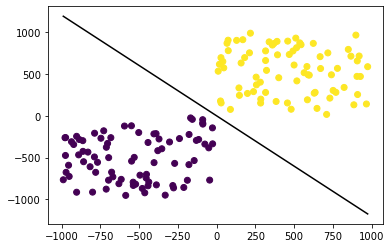

In [26]:
from sklearn.model_selection import train_test_split

import import_ipynb
from perceptron import Perceptron

X_train, X_test, y_train, y_test = train_test_split(X, Y_label, test_size=0.2)

#instantiate perceptron class, fit training data to perceptron, generate precictions on test data
p = Perceptron(learning_rate=0.1, n_iters=100)
p.fit(X_train, y_train)
pred = p.predict(X_test)

# funtion to calculate accuracy of predictions
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("Perceptron classification accuracy", accuracy(y_test, pred))
print(p.weights[0])
print(p.weights[1])
print(p.bias)

# scatterplot showing all X training data as point circles
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

# minimum and maximum of x1 values in X_train used to plot linear decision boundary
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

# calculations for plotting linear decision boundary
x1_1 = (-p.weights[0]*x0_1 - p.bias)/p.weights[1]
x1_2 = (-p.weights[0]*x0_2 - p.bias)/p.weights[1]

# plots the linear decision boundary
ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

plt.show

## Generate subplots of initial and two intermediate states

The code section above shows a very clearly defined boundary line that seperates the two classes perfectly after 100 iterations, or epochs. Now, we will look at the initial boundary line after one iteration only, followed by two intermediate states after 20 iterations and 50 iterations.

Weights and bias after 1 iteration:
151.20000000000002
143.4
0.2
Weights and bias after 20 iterations:
151.20000000000002
143.4
0.2
Weights and bias after 50 iterations:
151.20000000000002
143.4
0.2


<function matplotlib.pyplot.show(*args, **kw)>

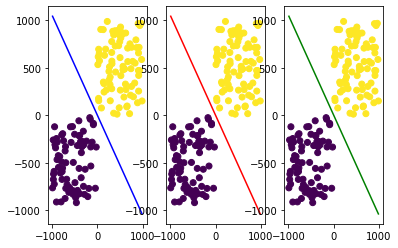

In [24]:
#instantiate perceptron class, fit training data to perceptron, generate precictions on test data
p1 = Perceptron(learning_rate=0.1, n_iters=1)
p20 = Perceptron(learning_rate=0.1, n_iters=20)
p50 = Perceptron(learning_rate=0.1, n_iters=50)

p1.fit(X_train, y_train)
p20.fit(X_train, y_train)
p50.fit(X_train, y_train)

print("Weights and bias after 1 iteration:")
print(p1.weights[0])
print(p1.weights[1])
print(p1.bias)

print("Weights and bias after 20 iterations:")
print(p20.weights[0])
print(p20.weights[1])
print(p20.bias)

print("Weights and bias after 50 iterations:")
print(p50.weights[0])
print(p50.weights[1])
print(p50.bias)

# scatterplot showing all X training data as point circles
#fig = plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)
ax2.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)
ax3.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

# minimum and maximum of x1 values in X_train used to plot linear decision boundary
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

# calculations for plotting linear decision boundaries
x_1 = (-p1.weights[0]*x0_1 - p1.bias)/p1.weights[1]
x_2 = (-p1.weights[0]*x0_2 - p1.bias)/p1.weights[1]

x_3 = (-p20.weights[0]*x0_1 - p20.bias)/p20.weights[1]
x_4 = (-p20.weights[0]*x0_2 - p20.bias)/p20.weights[1]

x_5 = (-p50.weights[0]*x0_1 - p50.bias)/p50.weights[1]
x_6 = (-p50.weights[0]*x0_2 - p50.bias)/p50.weights[1]

#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')
#ax1.plot(x, y)
#ax2.plot(x, -y)

# plot for initial linear decision boundary colored blue
ax1.plot([x0_1, x0_2],[x_1, x_2], 'k', c='blue')

# plot for linear decision boundary after 20 iterations colored red
ax2.plot([x0_1, x0_2],[x_3, x_4], 'k', c='red')

# plot for linear decision boundary after 50 iterations colored red
ax3.plot([x0_1, x0_2],[x_5, x_6], 'k', c='green')

plt.show

We see that the perceptron performed well even after 1, 20, and 50 iteratiions. This is because the data was very easy to seperate linearly, which meant virtually no misclassifications during training.